<img src="./pictures/logo-insa.jpg" style="float:right; max-width: 120px; display: inline" alt="INSA" />

# Modeling of the mechanical load

*Written by Marc Budinger, INSA Toulouse, France*

The actuation system of the 1st stage of the launcher consists of a set of Lithium-ion batteries, a control unit (2 inverters and control/command electronics) and two electromechanical actuators (EMA). This set makes it possible to control the nozzle according to 2 axes of rotation. We will be interested here only in one axis axis of rotation and we will neglect the couplings between these 2 axes.


*Vega Launcher 1st stage (P80) :*  
![Vega 1st stage](./pictures/P80_stage1.png)


*Thrust Vector Control (TVC) actuation system :*  
![TVC Actuation system](./pictures/P80_vega_TVC_system.png)


## Nozzle modeling
   

In [1]:
from IPython.display import Markdown as md # enable Markdown printing

# Definition of nozzle equivalent parameters with engineering units
Jnozzle= 1.40E+03 # [kg.m2] Inertia
Knozzle= 1.52E+04 # [Nm/deg] Stiffness
Fnozzle= 1.74E+02 # [Nms/deg] Viscous damping

# 
md("""
The nozzle is composed of :
- a flexible bearing or flexseal which links the nozzle to the launcher and enables rotational movement. The equivalent characteristics and parameters for this flexible bearing are:
    - a **stiffness** of {:.0f} Nm/deg.
    - a **viscous damping** of {:.0f}	Nms/deg
- a rigid cone modeled here as: 
    - an **inertia** of {:.0f} kg.m^2
    """.format(Knozzle, Fnozzle, Jnozzle))


The nozzle is composed of :
- a flexible bearing or flexseal which links the nozzle to the launcher and enables rotational movement. The equivalent characteristics and parameters for this flexible bearing are:
    - a **stiffness** of 15200 Nm/deg.
    - a **viscous damping** of 174	Nms/deg
- a rigid cone modeled here as: 
    - an **inertia** of 1400 kg.m^2
    

*P80 Nozzle (from [ESA presentation](http://www.ingaero.uniroma1.it/attachments/1609_VEGA%20%20sapienza%20small.pdf)):*
![P80](./pictures/nozzle.png)

In [2]:
# import math package whic contains usefull mathematical functions and variables
import math
import numpy as np

# Calculate SI unit values of Knozzle and Fnozzle
# pi value is math.pi

# student part -------------
Knozzle = Knozzle / (math.pi/180)
Fnozzle = Fnozzle / (math.pi/180)
# --------------------------

# Print the corresponding values with print("xxx %f xxx %f "%(value1,value2)
md("""
>Remark: SI unit conversion of these parameters *K<sub>nozzle</sub>* = {:.2e} Nm/rad and *F<sub>nozzle</sub>* = {:.2e} Nms/rad
""".format(Knozzle, Fnozzle))
        


>Remark: SI unit conversion of these parameters *K<sub>nozzle</sub>* = 8.71e+05 Nm/rad and *F<sub>nozzle</sub>* = 9.97e+03 Nms/rad


### Lever arm calculation

The EMA (Electro Mechanical Actuator) is between M and N points of the following drawing. The given values correspond to a nominal case. But during the sizng we want to evaluate and optimize the position of N and M points. d1 and d2 are thus design variables. 

*P80 Nozzle section :*  
<img src="./pictures/LeverArmNozzle.png" style="float:center; max-width: 400px; display: center" alt="P80" /></a> 



For the following steps, we need to calculate the equivalent lever arm between the linear displacement of the actuator and the rotational displacement of the nozzle. Thanks to the *Sympy* package, a symbolic calculation of this lever arm, function of d1 and d2, is possible. 

Remember that the link between the torque T on the nozzle and the force F of the actuator can be calculated with the following cross product:  
$\vec{T}=\vec{OM} \times \vec{F}=\vec{OM} \times \frac{\vec{NM}}{\left|\vec{NM}\right|} F $  
thus the equivalent lever arm can be calculated with:  
$L_{arm}=\left| \vec{OM} \times \frac{\vec{NM}}{\left|\vec{NM}\right|} \right|$  
and the torque can be calculated with the simple equation:  
$T=L_{arm}.F$

Remark: the variation of lever arm with position order is assumed to be negligeable here due to the small nozzle deflection (+/- 5.7° max)

In [30]:
# import vector manipulation and symbols definition of Sympy
from sympy.physics.mechanics import ReferenceFrame, Vector
from sympy import symbols, lambdify
import sympy 

alpha=13*3.14/180  # [rad] cone angle

# definition of d1 and d2 variable for symbolic calculation
d1, d2= symbols('d1 d2')

# definition of a reference frame for vectors definiions
N = ReferenceFrame('N')

# definition of OM and ON vectors thanks N.x and N.y reference (unit) vectors
OM=(0.5+(2.145+d1)*np.sin(alpha))*N.x+(0.718-(2.145+d1)*np.cos(alpha))*N.y
     
ON=1.358*N.x-(0.2+d2)*N.y

# Actuator length
NM=OM-ON   

# The lever arm
Larm=(OM ^NM.normalize()).magnitude()




The expression of the actuator length is : 

In [31]:
Larm.evalf(4)

0.8532*((-(-0.9744*d1 - 1.372)*(0.2248*d1 - 0.3757)*(0.1028*(0.5984*d1 - 1.0)**2 + (-0.8313*d1 + 0.8532*d2 - 1.0)**2)**(-0.5) + (0.2248*d1 + 0.9823)*(0.1028*(0.5984*d1 - 1.0)**2 + (-0.8313*d1 + 0.8532*d2 - 1.0)**2)**(-0.5)*(-0.9744*d1 + d2 - 1.172))**2)**0.5

The expression of the equivalent lever arm  is : 

In [32]:
Larm.evalf(4)

0.8532*((-(-0.9744*d1 - 1.372)*(0.2248*d1 - 0.3757)*(0.1028*(0.5984*d1 - 1.0)**2 + (-0.8313*d1 + 0.8532*d2 - 1.0)**2)**(-0.5) + (0.2248*d1 + 0.9823)*(0.1028*(0.5984*d1 - 1.0)**2 + (-0.8313*d1 + 0.8532*d2 - 1.0)**2)**(-0.5)*(-0.9744*d1 + d2 - 1.172))**2)**0.5

This expression can be evaluated:
- at the nominal anchorage point (d1=0 and d2=0)
- for different anchorage points 

In [33]:
# Transform the expression into a numerical function
Evaluate_Larm=lambdify((d1,d2),Larm)

md("The lever arm for the nominal dimensions is %4.2f m"%Evaluate_Larm(0,0))


The lever arm for the nominal dimensions is 1.35 m

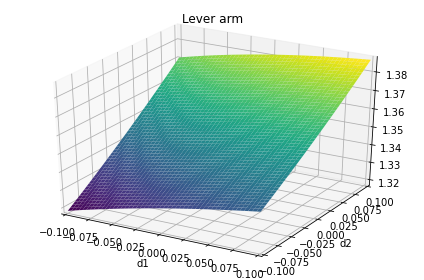

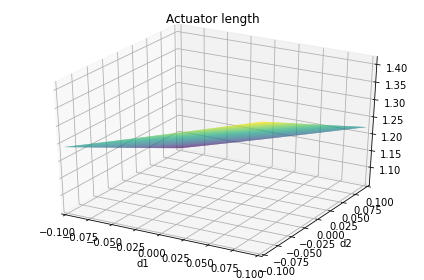

In [34]:
# Import plot3d function  from sympy package 
from sympy.plotting import plot3d

%matplotlib inline

# plot the Lever arm in function of d1 and d2 variables
plot3d(Larm, (d1, -.1, +.1), (d2, -.1, +.1), xlabel='d1', ylabel='d2', title='Lever arm')

# plot the Actuator Length in function of d1 and d2 variables
plot3d(NM.magnitude(), (d1, -.1, +.1), (d2, -.1, +.1), xlabel='d1', ylabel='d2', title='Actuator length')


## Sizing scenarios modeling

2 use cases must be checked during the design:
- a static deflection of 5.7 °
- a dynamic mission profile which must ensure a response time of 72 ms for a position step from 5.2 to 5.7°.
   
    

### Static sizing scenario



The maximal angular displacement is 5.7°. The corresping force can be calculated thanks the flexible bearing stiffness.

In [35]:
teta_max=5.7*math.pi/180

Fstat_max=Knozzle*teta_max/Evaluate_Larm(0,0)

md("The maximum static force is %4.2e N."%Fstat_max)

The maximum static force is 6.40e+04 N.

### Dynamic sizing scenario

For this scenario, we will assume that the position close loop system will response as a second order filter between real position and order:  
$H(p)=\frac{1}{1+\frac{2\xi p}{\omega_0}+\frac{p^2}{\omega_0^2}}$  
with $\xi=0.7$ and thus $t_{r5}=\frac{2.9}{\omega_0}$  

We calculate here position, speed and acceleration of the nozzle for a step request (5.2 to 5.7° in 72 ms).



In [1]:
# Import from scipy of the step response
from scipy.signal import step

# Definition of time response, damping coef, and angular frequency of the filter
tr=72e-3
w0=2.9/tr
eps=0.7

# position calculation with a second order step response
num = [1.]
den = [1/w0**2, 2*eps/w0, 1]
t, y = step(system=(num, den))
y = 5.2+0.5*y

# speed, we change here only the numerator of the transfer function
nump = [1., 0.]
t, yp = step(system=(nump, den))
yp=.5*yp

# acceleration
nump = [1., 0., 0.]
t, ypp = step(system=(nump, den))
ypp=.5*ypp

# plot of the different dynamic answers
import matplotlib.pyplot as plt

f, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True)
ax1.plot(t,y)
ax1.set_ylabel('Position (°)')
ax2.plot(t, yp)
ax2.set_ylabel('Speed (°/s)')
ax3.plot(t,ypp)
ax3.set_ylabel('Acceleration (°/s²)')
ax3.set_xlabel('Time (s)')
plt.show()



ModuleNotFoundError: No module named 'matplotlib'

It's now possible to calculate the force of the actuator which is requested to respect this mission profile.

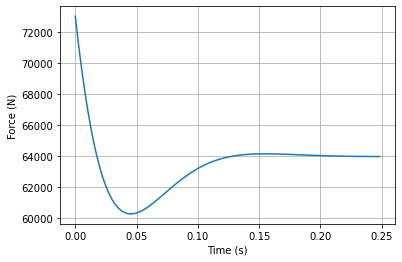

In [37]:
# degree to rad
teta, tetap, tetapp = math.pi/180*y, math.pi/180*yp, math.pi/180*ypp

# Force calculation
Fdyn=(Jnozzle*tetapp+Fnozzle*tetap+Knozzle*teta)/Evaluate_Larm(0,0)

g, gx1 = plt.subplots(1,1, sharex=True)
gx1.plot(t,Fdyn)
gx1.set_ylabel('Force (N)')
gx1.set_xlabel('Time (s)')
gx1.grid()
plt.show()

# Force speed diagram 

This sizing scenarios can be represented on a force-speed diagram usefull for compenent selection.


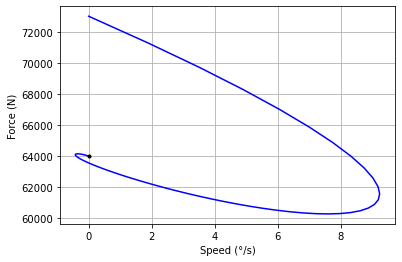

In [38]:
# we create here a force-speed diagram
h, hx1 = plt.subplots(1,1, sharex=True)
hx1.plot(yp,Fdyn,'b',0,Fstat_max,'.k')
hx1.set_ylabel('Force (N)')
hx1.set_xlabel('Speed (°/s)')
hx1.grid()
plt.show()

## Summary

For the next sizing steps, we will use 
- the nozzle max speed (step response)
- the max static torque (max deflexion)
- for max dynamic point (step response) : Max force with acceleration
    
In the nozzle frame (rotational movement):

In [39]:
import pandas as pd
 
df_rot = pd.DataFrame({'Value': [max(yp),Knozzle*teta_max, max(Fdyn),max(ypp) ], 'Unit': ['°/s', 'N.m', 'N.m', '°/s²']},
                      index = ['Max nozzle rotational speed', 'Max static torque', 'Max dynamic torque', 'Max acceleration'])

pd.options.display.float_format = '{:,.2e}'.format

md(df_rot.to_markdown())

|                             |       Value | Unit   |
|:----------------------------|------------:|:-------|
| Max nozzle rotational speed |     9.23502 | °/s    |
| Max static torque           | 86640       | N.m    |
| Max dynamic torque          | 73000.8     | N.m    |
| Max acceleration            |   811.15    | °/s²   |

For the linear actuator (translational movement) with $d_1=0$ and $d_2=0$:

In [40]:
df_lin = pd.DataFrame({'Value': [Evaluate_Larm(0,0),max(yp)*np.pi/180*Evaluate_Larm(0,0), Knozzle*teta_max/Evaluate_Larm(0,0),max(Fdyn), max(ypp)*Evaluate_Larm(0,0)*np.pi/180], 
                       'Unit': ['m', 'm/s', 'N', 'N', 'm/s²']},
                      index = ['Lever arm', 'Max linear speed', 'Max static force', 'Max dynamic force', 'Max acceleration'])

md(df_lin.to_markdown())


|                   |        Value | Unit   |
|:------------------|-------------:|:-------|
| Lever arm         |     1.35423  | m      |
| Max linear speed  |     0.218277 | m/s    |
| Max static force  | 63977.1      | N      |
| Max dynamic force | 73000.8      | N      |
| Max acceleration  |    19.1722   | m/s²   |